In [1]:
import pandas as pd
# import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import random
# import string
%matplotlib inline


# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [2]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

In [3]:
full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full", advice=True)
advice_df = advice_df[advice_df["year"]<2020]
full_df = imp.init_df(full_filename, "full")
full_df = full_df[full_df["year"]<2020]
full_df["advice"] = ["yes" if "advice" in x else "no" for x in full_df["tags"]]
advice_tag_df = full_df[full_df.advice=="yes"]

print("done")

done


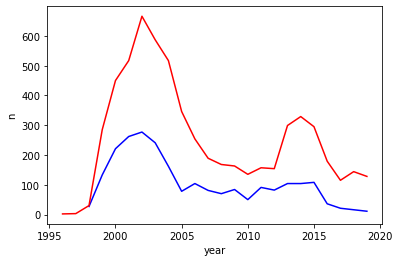

In [6]:
full_vis = vis.prep_per(full_df, group_by="year")
advice_vis = vis.prep_per(advice_df, group_by="year")

sns.lineplot(x = "year", y = "n", color = "blue", data=advice_vis)
sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

# plt.savefig("../figs/advice_section.png")

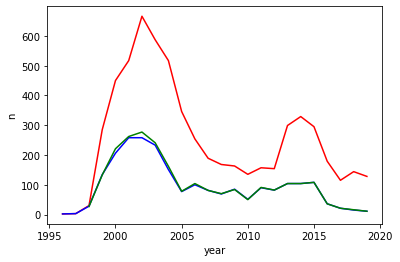

In [8]:
# advice by tag--also okay

advice_tag_vis = vis.prep_per(advice_tag_df, group_by="year")

sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data=advice_tag_vis)
sns.lineplot(x = "year", y = "n", color = "green", data=advice_vis)

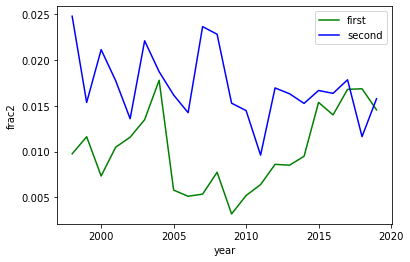

In [23]:
# just using the advice scrape only 

counts_df = clh.pronouns(advice_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_plot_df = counts_df.groupby("year").mean()

counts_plot_df = counts_plot_df.reset_index()

# counts_plot_df.head()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts_plot_df)

# plt.savefig("../figs/person_advice.png")

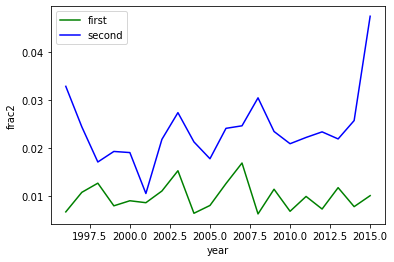

In [35]:
# just using the advice tagged articles in the full dataset--again, not sure if this one works--don't think the advice tag is as reliable as the sectioning off

counts_df = clh.pronouns(advice_tag_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_plot_df = counts_df.groupby("year").mean()

counts_plot_df = counts_plot_df.reset_index()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts_plot_df)

In [ ]:
# just using the advice scrape only 

counts_df = clh.pronouns(advice_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_plot_df = counts_df.groupby("year").mean()

counts_plot_df = counts_plot_df.reset_index()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts_plot_df)


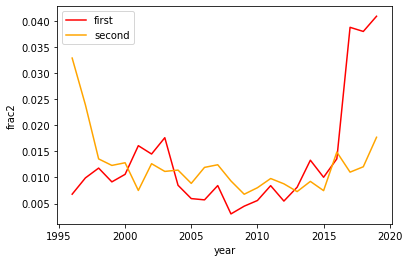

In [37]:
counts_df = clh.pronouns(full_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_plot_df = counts_df.groupby("year").mean()

full_counts_plot_df = counts_plot_df.reset_index()
counts_df.head()

sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=full_counts_plot_df)

# plt.savefig("../figs/person_all.png")


In [38]:
#hi

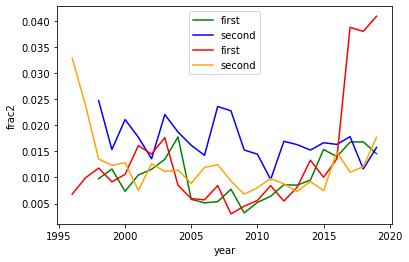

In [22]:
sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts_plot_df)
sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=full_counts_plot_df)

# plt.savefig("../figs/person_advice_all.png")

same thing but for columns

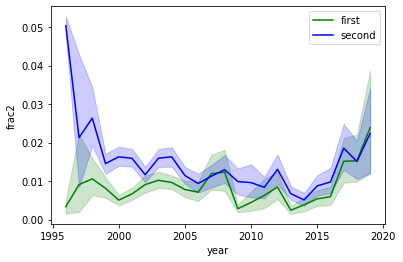

In [9]:
column_df = full_df[full_df.column2=="yes"]
not_column_df = full_df[full_df.column2=="no"]

counts1_df = clh.pronouns(column_df)
counts2_df = clh.pronouns(not_column_df)


counts1_df["frac1"] = counts1_df["first"]/counts1_df["wc"]
counts1_df["frac2"] = counts1_df["second"]/counts1_df["wc"]
counts2_df["frac1"] = counts2_df["first"]/counts2_df["wc"]
counts2_df["frac2"] = counts2_df["second"]/counts2_df["wc"]

counts1_plot_df = counts1_df.groupby("year").mean()
counts2_plot_df = counts2_df.groupby("year").mean()

counts1_plot_df = counts1_plot_df.reset_index()
counts2_plot_df = counts2_plot_df.reset_index()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts1_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts1_df)
# sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=counts2_df)
# sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=counts2_df)